In [75]:
import numpy as np
import scipy.stats as sps
import pandas as pd
from numpy import cos, sin, pi, sqrt
import matplotlib.pyplot as plt

# LAB 1 Statistics 

In [76]:
gamma = 0.01
z_gamma = 2.575

A.	Побудувати довірчий інтервал для математичного сподівання   у припущенні, що спостерігаються в.в.  , які мають нормальний розподіл, але дисперсія   невідома.

B.	Побудувати довірчий інтервал для математичного сподівання   у припущенні, що спостерігаються в.в.  , розподіл яких невідомий.

C.	Побудувати довірчий інтервал для дисперсії   у припущенні, що спостерігаються в.в.  , які мають нормальний розподіл.

In [77]:
def get_sample (n):
    sample = sps.norm(loc=0, scale=1).rvs(size=n)
    return sample

In [78]:
def a_unknown_sigma (n):
    sample = get_sample (n)
    a_ = sum(sample)/n
    s_ =sum((sample-a_)**2)/n
    left = a_ - z_gamma*sqrt(s_)/sqrt(n-1)
    right = a_ + z_gamma*sqrt(s_)/sqrt(n-1)
    print('Оцінка а: ', a_)
    print('Оцінка s: ', s_)
    print('Довірчий інтервал: [', left, ',', right, ']')
    print('Довжина довірчого інтервалу', right-left)
    print()

In [79]:
def a_unknown_rosp (n):
    sample = get_sample (n)
    a_ = sum(sample)/n
    s_ =sum((sample-a_)**2)/(n-1)
    left = a_ - z_gamma*sqrt(s_)/sqrt(n)
    right = a_ + z_gamma*sqrt(s_)/sqrt(n)
    print('Оцінка а: ', a_)
    print('Оцінка s: ', s_)
    print('Довірчий інтервал: [', left, ',', right, ']')
    print('Довжина довірчого інтервалу', right-left)
    print()

In [80]:
def sigma (n, z_gamma_1, z_gamma_2):
    sample = get_sample (n)
    a_ = sum(sample)/n
    s_ =sum((sample-a_)**2)/(n)
    left = n*s_/z_gamma_2
    right = n*s_/z_gamma_1
    print('Оцінка s: ', s_)
    print('Довірчий інтервал: [', left, ',', right, ']')
    print('Довжина довірчого інтервалу', right-left)
    print()

In [81]:
for n, z1, z2 in ([100, 66.51010530174, 138.98678345094], [10000, 9638.49819654161, 10367.01483839750], [1000000, 996359.98575676900, 1003645.52743709000]):
    print('N = ', n)
    a_unknown_sigma (n)
    a_unknown_rosp (n)
    sigma (n, z1, z2)

N =  100
Оцінка а:  -0.039912747865561336
Оцінка s:  1.0813413891039212
Довірчий інтервал: [ -0.3090296960484369 , 0.22920420031731423 ]
Довжина довірчого інтервалу 0.5382338963657511

Оцінка а:  0.1642768321283112
Оцінка s:  0.87864858211821
Довірчий інтервал: [ -0.07709402888866318 , 0.4056476931452856 ]
Довжина довірчого інтервалу 0.4827417220339488

Оцінка s:  1.245120099748415
Довірчий інтервал: [ 0.8958550365962828 , 1.8720765725743649 ]
Довжина довірчого інтервалу 0.976221535978082

N =  10000
Оцінка а:  0.0009957413031911329
Оцінка s:  1.021921623990823
Довірчий інтервал: [ -0.025036271169430968 , 0.027027753775813235 ]
Довжина довірчого інтервалу 0.0520640249452442

Оцінка а:  0.014108058659448332
Оцінка s:  1.0023702462076003
Довірчий інтервал: [ -0.011672440198720161 , 0.03988855751761683 ]
Довжина довірчого інтервалу 0.05156099771633699

Оцінка s:  1.0403263420000441
Довірчий інтервал: [ 1.0034965303096397 , 1.0793448530947733 ]
Довжина довірчого інтервалу 0.075848322785133

###  	При кожному  m  обчислити точне значення ймовірності   (для перевірки коректності алгоритмів моделювання).

In [82]:
from scipy import integrate
from sympy import factorial
import math

def funс(u):
    return math.exp(-u) * np.power(u, np.array(m-1)) / ((1 + u)*factorial(m - 1))

In [83]:
m = 1
Q = integrate.quad(funс, 0, np.infty)[0]
print("Q=", Q)

Q= 0.5963473623231728


In [84]:
m = 10
Q = integrate.quad(funс, 0, np.infty)[0]
print("Q=", Q)

Q= 0.09892913264064612


# Метод Монте Карло
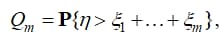
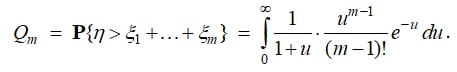



In [85]:
e = 0.01

In [94]:
def generate_random(n):
    omega_arr = np.random.sample(n)
    xci_arr = (-1) * np.log(omega_arr)
    return sum(xci_arr)

### 1-й метод
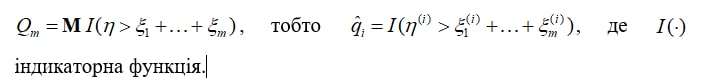

In [95]:
def get_q_method1 (eta, summ):
    return 1 if eta > summ else 0

def method(m):
    n = 0
    Q_ = 0
    sigma = 0
    sum_qi = 0
    sum_qi2 = 0 
    sigma2n = 0 
    n_check = 10
    while n < n_check:
        n = n + 1
        summ = generate_random(m)
        omega = np.random.sample() #generate eta
        eta = (1 / omega) - 1

        qi = get_q_method1( eta, summ)
        #print(qi)
        sum_qi = sum_qi + qi
        sum_qi2 = sum_qi2 + qi**2
        sigma2n = sigma2n + ((qi - (sum_qi / n)) ** 2)
        
        if n>=2 and sum_qi!=0:
            Q_ = sum_qi/n
            #print(Q_)
            sigma = (sum_qi2 - n*(Q_**2)) / (n-1)
            n_check = (sigma*z_gamma)**2 / ((e*Q_)**2)
    return Q_, sigma, n_check, n

In [98]:
method(1)

(0.6025384101536406, 0.2395087305105853, 10476.776759721446, 10479)

In [99]:
method(10)

(0.09999813818398466, 0.09000018618160154, 53710.28466504419, 53711)

In [100]:
method(100)

(0.00932726881588248, 0.009240412862128853, 65077.106028709415, 65078)

In [110]:
method(10000)

(0, 0, 10, 10)

### 2-й метод
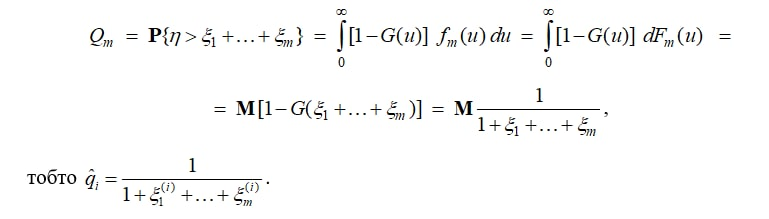

In [112]:
import random
def method2(m):
    n = 0
    Q_ = 0
    sigma = 0
    sum_qi = 0
    sum_qi2 = 0 
    sigma2n = 0 
    n_check = 10
    while n < n_check:
        n = n + 1
        summ = generate_random(m)
        
        qi = 1 / (summ + 1) 
        #print(qi)
        sum_qi = sum_qi + qi
        sum_qi2 = sum_qi2 + qi**2
        sigma2n = sigma2n + ((qi - (sum_qi / n)) ** 2)
        
        if n>=2 and sum_qi!=0:
            Q_ = sum_qi/n
            #print(Q_)
            sigma = (sum_qi2 - n*(Q_**2)) / (n-1)
            n_check = (sigma*z_gamma)**2 / ((e*Q_)**2)
    return Q_, sigma, n_check, n



In [114]:
method2(1)    

(0.5968828959692588, 0.04304115953499579, 344.78163442198417, 345)

In [117]:
method2(10)  

(0.09213902278960506, 0.0001541412973851304, 0.1855689383338712, 2)

In [118]:
method2(100)

(0.01149734791421545, 8.675947594318531e-07, 0.0003775660703869467, 2)

In [119]:
method2(10000) 

(0.00010043409764602668, 4.7349381040738356e-12, 1.4737394704991949e-10, 2)

### 4-й метод
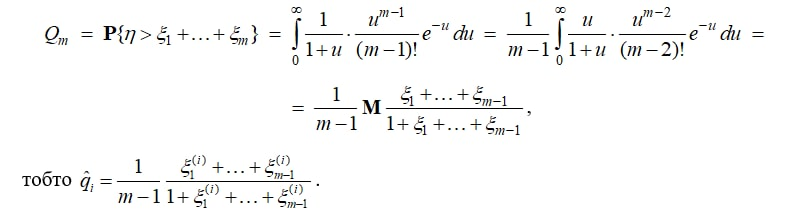

In [120]:
import random
def method4(m):
    n = 0
    Q_ = 0
    sigma = 0
    sum_qi = 0
    sum_qi2 = 0 
    sigma2n = 0 
    n_check = 10
    while n < n_check:
        n = n + 1
        omega_arr = np.random.sample(m-1)
        xci_arr = (-1) * np.log(omega_arr)
        
        qi = np.sum(xci_arr) / ((m-1)*(1 + np.sum(xci_arr)))
        #print(qi)
        sum_qi = sum_qi + qi
        sum_qi2 = sum_qi2 + qi**2
        sigma2n = sigma2n + ((qi - (sum_qi / n)) ** 2)
        
        if n>=2 and sum_qi!=0:
            Q_ = sum_qi/n
            #print(Q_)
            sigma = (sum_qi2 - n*(Q_**2)) / (n-1)
            n_check = (sigma*z_gamma)**2 / ((e*Q_)**2)
    return Q_, sigma, n_check, n



In [126]:
method4(10) 

(0.10236812083594557, 3.968484060101057e-06, 9.964930754168936e-05, 2)

In [121]:
method4(100) 

(0.0100053807222465, 2.3329740401903734e-11, 3.605014711960091e-13, 2)

In [122]:
method4(10000) 

(0.00010000008203396713, 1.373119816838026e-21, 1.2501744648044552e-29, 2)